# Задание 1

Реализованы следующие архитектуры нейросетей для реешния задачи:  
 - `ResNet50`, обученная на ImageNet с замороженными весами и добавлением слоя классификатора   


 - `ResNet50`, все веса обучаемы, слой классификатора адаптирован под зхадачу 

 - `CustomCNN` - модификация свёрточной сети из примера с удвоенным количеством свёрток  
 

Наилучшее значение метрики `accuracy` показала сеть `CustomCNN`. Причиной этого является малое количество параметров: задача классификации `CIFAR10` не является сложной (в наше время), сеть быстро обучается. Вероятно, при увеличении количсетва эпох, `ResNet50` без замороженных весов будет показывать более хорошие показатели качества, но и сложность такой сети возрпастает многократно.

# Задание 2  

В качестве основной сети была выбрана `CustomCNN`. Добавление аугментаций ухудшило результаты. 

Возможной причиной уменьшения метрики качества является малое малое количестве восов модели: модель старается обобщить и исходные данные, и аугментированные данные.

# Задание 4  
Релизованы две нейросети для решения задачи классификации на датасете `17 Category Flower Dataset`  
 - Сеть с несколькими с 6 свёрточными слоями и MaxPooling между ними, а также три линейных слоя с функцией активацйии `ReLU`. 

 - ResNet50 с обучаемыми параметрами и модифицированным слоям классификатора. Данная нейросеть показала хорошие резульаты, достигнув значения `accuracy` в 90%. Из минусов: данная архитектура весьма тяжёлая и долго обучается.






# Исходный код

# Пример

In [ ]:
import pandas as pd
import numpy as np
# import tensorflow as tf
# from tensorflow.keras import layers, losses, datasets
import matplotlib.pyplot as plt
import seaborn as sns

import warnings


warnings.filterwarnings("ignore")
sns.set_theme()

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [ ]:
cnn_model = tf.keras.Sequential([
    # Задаем свертку
    # 32 — количество каналов на выходе
    # (3, 3) — размер окна
    # по умолчанию stride'ы — (1, 1)
    # по умолчанию padding не используется
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Задаем пулинг
    # (2, 2) — размер окна
    # по умолчанию сдвиг идет на размер окна
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    # теперь вытянем все в линию
    # на вход подается тензор (32, 32, 3)
    # — (ширина, высота, каналы)
    # после первой свертки получается (30, 30, 32)
    # так как размер 3х3 и сдвиг 1х1
    # после 2х2 пулинга остается (15, 15, 32)
    # далее свертка делает (13, 13, 64), потом пулинг
    # (6, 6, 64) и еще одна свертка
    # делает (4, 4, 64). Это вытягиваем в вектор
    # длиной 4x4x64 = 1024.
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10),
    layers.Softmax()],
    name = "cnn_model"
)
cnn_model.summary()


Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0 

In [ ]:
preprocessing = layers.Rescaling(1 / 255.)

In [ ]:
base_model = tf.keras.Sequential(
    [
        preprocessing,
        cnn_model
    ],
    name = "base_model"
)

In [ ]:
base_model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
base_model_history = base_model.fit(train_images, train_labels, epochs=20,
                                    validation_data=(test_images, test_labels))


Epoch 1/20
1563/1563 [==============================] - 86s 54ms/step - loss: 1.5493 - accuracy: 0.4393 - val_loss: 1.4489 - val_accuracy: 0.4789
Epoch 2/20
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1497 - accuracy: 0.5963 - val_loss: 1.1392 - val_accuracy: 0.5929
Epoch 3/20
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9803 - accuracy: 0.6568 - val_loss: 1.1273 - val_accuracy: 0.6082
Epoch 4/20
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8656 - accuracy: 0.6986 - val_loss: 0.9325 - val_accuracy: 0.6767
Epoch 5/20
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7860 - accuracy: 0.7234 - val_loss: 0.9033 - val_accuracy: 0.6938
Epoch 6/20
1563/1563 [==============================] - 86s 55ms/step - loss: 0.7171 - accuracy: 0.7521 - val_loss: 0.8513 - val_accuracy: 0.7110
Epoch 7/20
1563/1563 [==============================] - 90s 58ms/step - loss: 0.6639 - accuracy: 0.7692 - val_loss: 0.8915 -

In [ ]:
from typing import Dict, List, Tuple
def plot_history(
    history: Dict[str, List[float]],
    title: str = "",
    metric_name: str = 'loss',
    ylim: Tuple[float, float] = None):

    train_values = history[metric_name]
    plt.plot(train_values, label=f'Train {metric_name}')
    try:
        val_values = history['val_' + metric_name]
        plt.plot(val_values, label=f'Validation {metric_name}')
    except KeyError:
        val_values = []
    plt.title(title)
    all_values = train_values + val_values
    ylim = ylim or (0.9 * min(all_values), 1.1 * max(all_values))
    plt.ylim(ylim)
    plt.ylabel(metric_name.capitalize())
    plt.xlabel("Epoch")
    plt.legend(loc='best')
    plt.show()

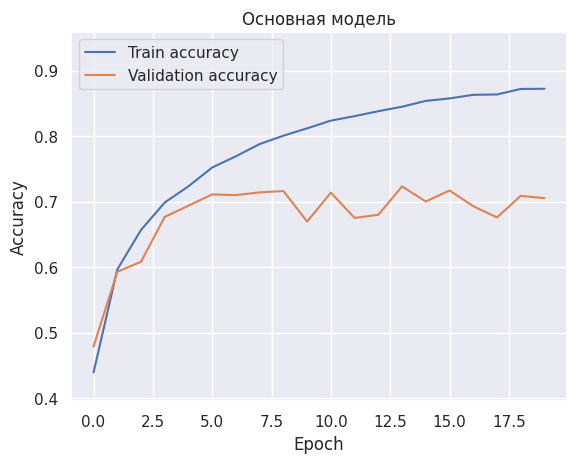

In [ ]:
plot_history(base_model_history.history, "Основная модель", "accuracy")

In [ ]:
base_model_history.history['val_accuracy'][-1]

0.705299973487854

# Augmentations

In [ ]:

augmentation = tf.keras.Sequential([
    # случайным образом отражаем по горизонтали
    layers.RandomFlip("horizontal"),
    # вращаем на +-18 градусов
    layers.RandomRotation(0.05),
    # изменим контраст на +-20%
    layers.RandomContrast((0.8, 1.2))
])

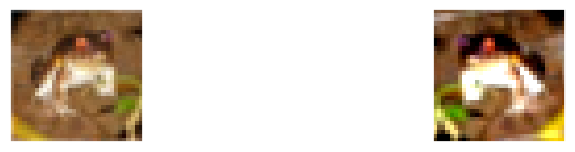

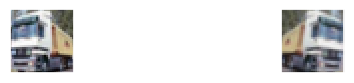

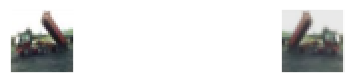

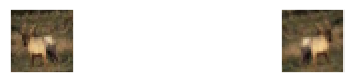

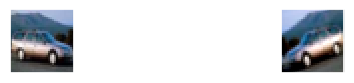

In [ ]:
def show_augmentation(augmentation):
    plt.figure(figsize=(10,10))
    for i in range(5):
        original = preprocessing(train_images[i])
        augmented = augmentation(original, training=True)

        plt.subplot(5, 2, 2*i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(original)
        plt.subplot(5, 2, 2*i+2)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(augmented)
        plt.show()

show_augmentation(augmentation)

In [ ]:
from tensorflow.image import stateless_random_saturation
class RandomSaturation(layers.Layer):
    def __init__(self, lower, upper, seed=None, **kwargs):
        super().__init__(**kwargs)
        self.lower = lower
        self.upper = upper
        self.seed = seed or 0

    def call(self, x, training=True):
        """
        Эта функция реализует отображение этим слоем.
        Используем параметр `training`, чтобы отключить этот
        слой во время использования модели
        """
        if training:
            self.seed += 1
            return stateless_random_saturation(
                x,
                self.lower,
                self.upper,
                (self.seed, self.seed)
            )
        else:
            return x
# изменяем насыщенность в пределе 50-200%
my_augmentation = RandomSaturation(0.5, 2)

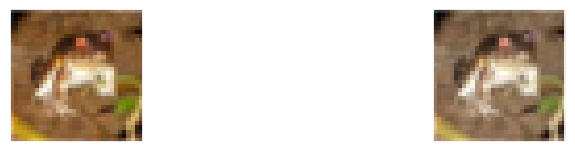

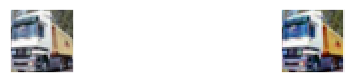

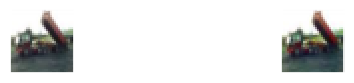

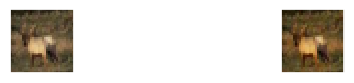

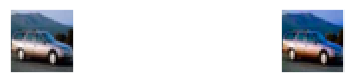

In [ ]:
show_augmentation(my_augmentation)

In [ ]:
model_w_augmentation = tf.keras.Sequential([
    preprocessing,
    augmentation,
    tf.keras.models.clone_model(cnn_model)],
    name = "model-with-augmentation-1")

model_w_augmentation.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model_w_augmentation2 = tf.keras.Sequential([
    preprocessing,
    my_augmentation,
    tf.keras.models.clone_model(cnn_model)],
    name = "model-with-augmentation-2")

model_w_augmentation2.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
model_aug_history = model_w_augmentation.fit(
    train_images, train_labels, epochs=20,
    validation_data=(test_images, test_labels)
)

Epoch 1/20
1563/1563 [==============================] - 14s 7ms/step - loss: 1.7108 - accuracy: 0.3834 - val_loss: 1.3237 - val_accuracy: 0.5326
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3738 - accuracy: 0.5159 - val_loss: 1.1888 - val_accuracy: 0.5767
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2544 - accuracy: 0.5609 - val_loss: 1.1081 - val_accuracy: 0.6120
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1654 - accuracy: 0.5919 - val_loss: 1.1079 - val_accuracy: 0.6214
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1102 - accuracy: 0.6141 - val_loss: 1.0015 - val_accuracy: 0.6518
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0773 - accuracy: 0.6287 - val_loss: 0.9847 - val_accuracy: 0.6538
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0435 - accuracy: 0.6405 - val_loss: 1.0001 - val_accur

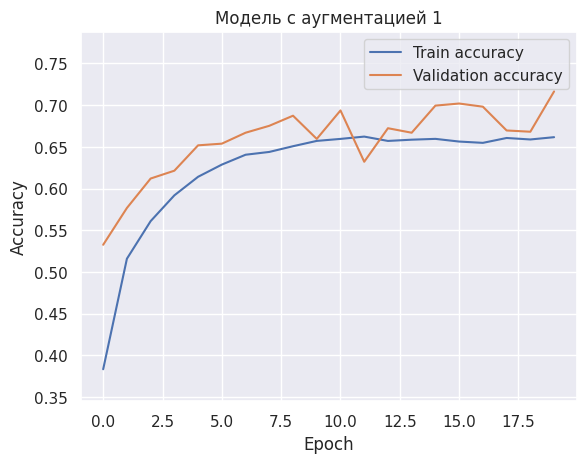

In [ ]:
plot_history(model_aug_history.history, "Модель с аугментацией 1", "accuracy")

In [ ]:
model_aug2_history = model_w_augmentation2.fit(
    train_images, train_labels, epochs=20,
    validation_data=(test_images, test_labels)
)

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5232 - accuracy: 0.4462 - val_loss: 1.4445 - val_accuracy: 0.4962
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1204 - accuracy: 0.6060 - val_loss: 1.1729 - val_accuracy: 0.6010
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9556 - accuracy: 0.6675 - val_loss: 1.0949 - val_accuracy: 0.6300
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8435 - accuracy: 0.7037 - val_loss: 0.9534 - val_accuracy: 0.6756
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7655 - accuracy: 0.7325 - val_loss: 0.9784 - val_accuracy: 0.6666
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7000 - accuracy: 0.7568 - val_loss: 1.0862 - val_accuracy: 0.6585
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6427 - accuracy: 0.7784 - val_loss: 1.1653 - val_accuracy:

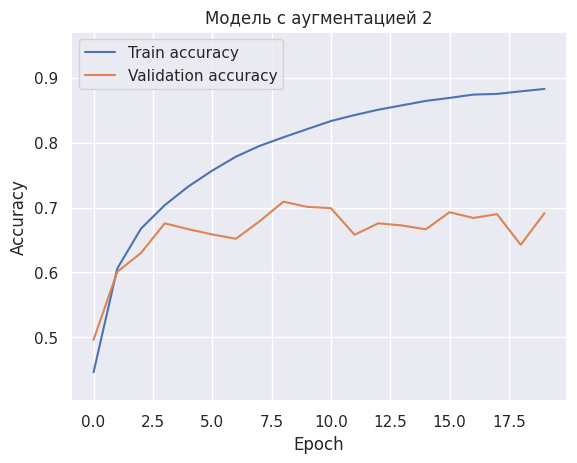

In [ ]:
plot_history(model_aug2_history.history, "Модель с аугментацией 2", "accuracy")

# Задание 1

In [ ]:
from tensorflow import keras


## RESNET (freeze)

In [ ]:
class ResNet50Mod(keras.Model):
    def __init__(self):
        super().__init__()
        base_model = keras.applications.ResNet50(include_top=False, input_shape=(32, 32, 3), weights="imagenet")
        base_model.trainable = False
        self.base = base_model
        self.layer_1 = keras.layers.Flatten()
        self.layer_2 = keras.layers.Dense(64, activation='relu')
        self.layer_3 = keras.layers.Dense(10, activation='softmax')

    @tf.function
    def call(self, xb):
        x = self.base(xb)
        x = self.layer_1(x)
        x = self.layer_2(x)
        return self.layer_3(x)

resnet50_mod = ResNet50Mod()


In [ ]:
resnet50 = tf.keras.Sequential([
        # preprocessing,
        # transforms,
        preprocessing,
        tf.keras.models.clone_model(resnet50_mod)
    ],
    name = "resnet50_mod"
)

resnet50.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
resnet50_history = resnet50.fit(
    train_images, train_labels, epochs=20,
    validation_data=(test_images, test_labels)
)

Epoch 1/20
1563/1563 [==============================] - 33s 15ms/step - loss: 2.0922 - accuracy: 0.2241 - val_loss: 1.9671 - val_accuracy: 0.2759
Epoch 2/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.9330 - accuracy: 0.2938 - val_loss: 1.8707 - val_accuracy: 0.3342
Epoch 3/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.8744 - accuracy: 0.3203 - val_loss: 1.9884 - val_accuracy: 0.2915
Epoch 4/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8408 - accuracy: 0.3361 - val_loss: 1.8978 - val_accuracy: 0.3158
Epoch 5/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.8134 - accuracy: 0.3453 - val_loss: 1.8567 - val_accuracy: 0.3197
Epoch 6/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.7958 - accuracy: 0.3512 - val_loss: 1.7935 - val_accuracy: 0.3520
Epoch 7/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.7812 - accuracy: 0.3587 - val_loss: 1.8577 -

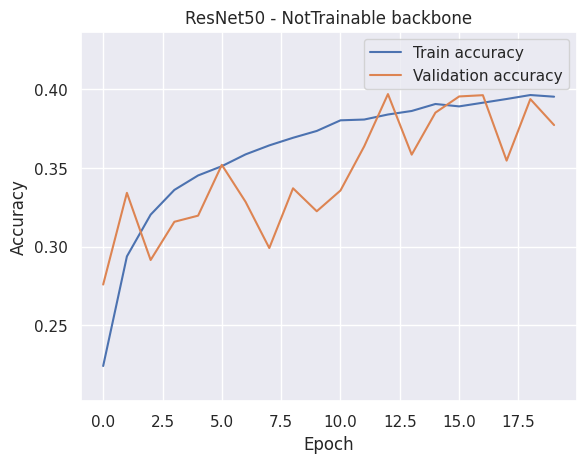

In [ ]:
plot_history(resnet50_history.history, "ResNet50 | Not trainable backbone", "accuracy")

## RESNET 50 | trainable

In [ ]:
class ResNet50ModTrainable(keras.Model):
    def __init__(self):
        super().__init__()
        base_model = keras.applications.ResNet50(include_top=False, input_shape=(32, 32, 3), weights="imagenet")
        base_model.trainable = True
        self.base = base_model
        self.layer_1 = keras.layers.Flatten()
        self.layer_2 = keras.layers.Dense(64, activation='relu')
        self.layer_3 = keras.layers.Dense(10, activation='softmax')

    @tf.function
    def call(self, xb):
        x = self.base(xb)
        x = self.layer_1(x)
        x = self.layer_2(x)
        return self.layer_3(x)

resnet50_mod_trainable = ResNet50ModTrainable()


In [ ]:
resnet50_trainable = tf.keras.Sequential([
        # preprocessing,
        # transforms,
        preprocessing,
        tf.keras.models.clone_model(resnet50_mod_trainable)
    ],
    name = "resnet50_mod"
)

resnet50_trainable.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
resnet50_trainable_history = resnet50_trainable.fit(
    train_images, train_labels, epochs=10,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1563/1563 [==============================] - 142s 41ms/step - loss: 1.5074 - accuracy: 0.4874 - val_loss: 1.1411 - val_accuracy: 0.6177
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0900 - accuracy: 0.6361 - val_loss: 1.0559 - val_accuracy: 0.6577
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9032 - accuracy: 0.7027 - val_loss: 0.9354 - val_accuracy: 0.6976
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7881 - accuracy: 0.7428 - val_loss: 0.8472 - val_accuracy: 0.7304
Epoch 5/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.7092 - accuracy: 0.7726 - val_loss: 0.8592 - val_accuracy: 0.7352
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6549 - accuracy: 0.7914 - val_loss: 0.7951 - val_accuracy: 0.7541
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.5855 - accuracy: 0.8133 - val_loss: 0.8301 

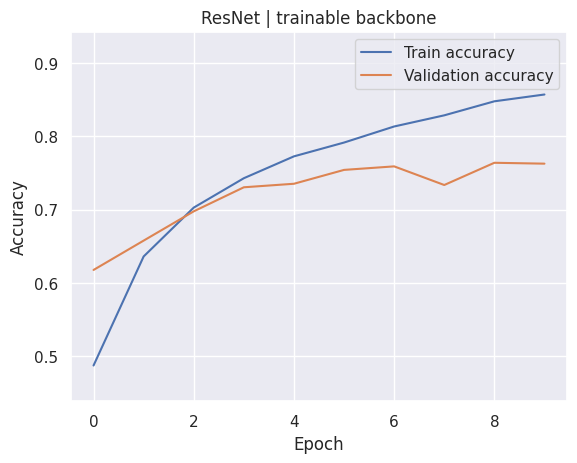

In [ ]:
plot_history(resnet50_trainable_history.history, "ResNet | trainable backbone", "accuracy")

## CustomCNN

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

from matplotlib import pyplot as plt
import seaborn as sns


sns.set_theme()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
def plot_acc(train_acc, valid_acc, title):
    plt.plot(train_acc, label="train accuracy")
    plt.plot(valid_acc, label="valid accuracy")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")
    plt.show()

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=1)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
class CustomCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1_1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding="same")
        self.conv1_2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding="same")
        self.pool_1 = nn.MaxPool2d(2, 2)
        self.conv2_1 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding="same")
        self.conv2_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
        self.pool_2 = nn.MaxPool2d(2, 2)
        self.conv3_1 = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, padding="same")
        self.conv3_2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding="same")

        self.fc1 = nn.Linear(4096, 2048)
        self.fc2 = nn.Linear(2048, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = self.pool_1(x)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.pool_2(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # x = F.softmax(self.fc3(x), dim=1)
        return x

In [ ]:
custom_model = CustomCNN().to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(custom_model.parameters(), lr=0.001)

In [ ]:
def fit(n_epochs, model, criterion, optimizer, trainloader, testloader):

    train_accuracy_list = []
    valid_accuracy_list = []
    for epoch in range(n_epochs):  # loop over the dataset multiple times

        correct = 0
        total = 0
        model.train(True)
        for i, data in tqdm(enumerate(trainloader, 0), total=len(trainloader)):
            inputs, labels = data[0].to(device), data[1].to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # print statistics
        train_accuracy = 100 * correct // total
        train_accuracy_list.append(train_accuracy)

        correct = 0
        total = 0
        model.eval()
        with torch.no_grad():
            for data in tqdm(testloader, total=len(testloader)):
                inputs, labels = data[0].to(device), data[1].to(device)

                # calculate outputs by running images through the network
                outputs = model(inputs)

                # the class with the highest energy is what we choose as prediction
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        valid_accuracy = 100 * correct // total
        valid_accuracy_list.append(valid_accuracy)

        print(f'Epoch: {epoch + 1}. Train acc: {train_accuracy} %, Valid acc: {valid_accuracy} %')

    return train_accuracy_list, valid_accuracy_list

In [ ]:
train_accuracy_list, valid_accuracy_list = fit(n_epochs=10, model=custom_model, criterion=criterion, optimizer=optimizer, trainloader=trainloader, testloader=testloader)

100%|██████████| 79/79 [00:05<00:00, 15.44it/s]


Epoch: 1. Train acc: 30 %, Valid acc: 48 %


100%|██████████| 79/79 [00:05<00:00, 15.39it/s]


Epoch: 2. Train acc: 54 %, Valid acc: 57 %


100%|██████████| 79/79 [00:04<00:00, 16.07it/s]


Epoch: 3. Train acc: 62 %, Valid acc: 67 %


100%|██████████| 79/79 [00:04<00:00, 16.03it/s]


Epoch: 4. Train acc: 72 %, Valid acc: 71 %


100%|██████████| 79/79 [00:04<00:00, 16.17it/s]


Epoch: 5. Train acc: 76 %, Valid acc: 71 %


100%|██████████| 79/79 [00:04<00:00, 15.82it/s]


Epoch: 6. Train acc: 80 %, Valid acc: 72 %


100%|██████████| 79/79 [00:05<00:00, 15.35it/s]


Epoch: 7. Train acc: 89 %, Valid acc: 76 %


100%|██████████| 79/79 [00:05<00:00, 15.17it/s]


Epoch: 8. Train acc: 93 %, Valid acc: 75 %


100%|██████████| 79/79 [00:05<00:00, 15.77it/s]


Epoch: 9. Train acc: 96 %, Valid acc: 76 %


100%|██████████| 79/79 [00:05<00:00, 15.58it/s]

Epoch: 10. Train acc: 97 %, Valid acc: 75 %


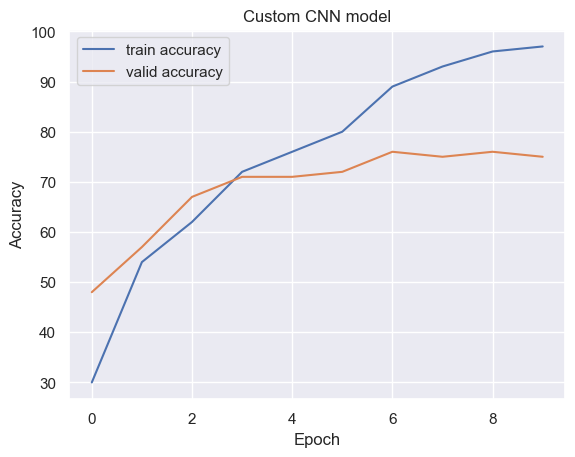

In [ ]:
plot_acc(train_accuracy_list, valid_accuracy_list, "Custom CNN model")

# Задание 2

За основу возьмум `CustomCNN` и добавим аугментацию данных

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2


In [ ]:
class Cifar10Dataset(torchvision.datasets.CIFAR10):
    def __init__(self, root="~/data/cifar10", train=True, download=True, transform=None):
        super().__init__(root=root, train=train, download=download, transform=transform)

    def __getitem__(self, index):
        image, label = self.data[index], self.targets[index]

        if self.transform is not None:
            transformed = self.transform(image=image)
            image = transformed["image"]

        return image, label

In [ ]:
train_transform = A.Compose(
    [
        A.Affine(scale=0.7, translate_percent=0.7, rotate=(-45, 45), p=0.3),
        A.RGBShift(r_shift_limit=(-10, 10), g_shift_limit=(-10, 10), b_shift_limit=(-10, 10), p=0.3),
        A.ToGray(p=0.5),
        A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
        ToTensorV2(),
    ]
)
test_transform = A.Compose(
    [
        A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
        ToTensorV2(),
    ]
)
batch_size = 128

trainset = Cifar10Dataset(root='./data', train=True,
                                        download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = Cifar10Dataset(root='./data', train=False,
                                       download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
custom_model_aug = CNN().to(device=device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(custom_model_aug.parameters(), lr=0.001)

In [ ]:
train_accuracy_list, valid_accuracy_list = fit(n_epochs=10, model=custom_model_aug, criterion=criterion, optimizer=optimizer, trainloader=trainloader, testloader=testloader)

100%|██████████| 79/79 [00:01<00:00, 46.26it/s]


Epoch: 1. Train acc: 19 %, Valid acc: 34 %


100%|██████████| 79/79 [00:01<00:00, 45.76it/s]


Epoch: 2. Train acc: 30 %, Valid acc: 41 %


100%|██████████| 79/79 [00:01<00:00, 46.37it/s]


Epoch: 3. Train acc: 34 %, Valid acc: 44 %


100%|██████████| 79/79 [00:01<00:00, 45.96it/s]


Epoch: 4. Train acc: 37 %, Valid acc: 47 %


100%|██████████| 79/79 [00:01<00:00, 46.41it/s]


Epoch: 5. Train acc: 39 %, Valid acc: 49 %


100%|██████████| 79/79 [00:01<00:00, 46.34it/s]


Epoch: 6. Train acc: 41 %, Valid acc: 50 %


100%|██████████| 79/79 [00:01<00:00, 45.30it/s]


Epoch: 7. Train acc: 43 %, Valid acc: 51 %


100%|██████████| 79/79 [00:01<00:00, 46.41it/s]


Epoch: 8. Train acc: 45 %, Valid acc: 51 %


100%|██████████| 79/79 [00:01<00:00, 46.49it/s]


Epoch: 9. Train acc: 46 %, Valid acc: 51 %


100%|██████████| 79/79 [00:01<00:00, 46.50it/s]

Epoch: 10. Train acc: 48 %, Valid acc: 51 %


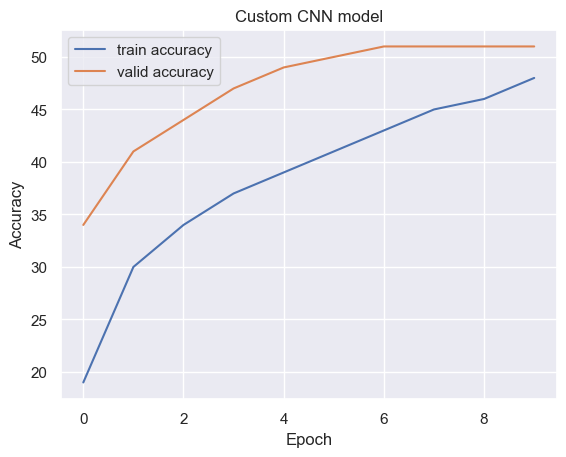

In [ ]:
plot_acc(train_accuracy_list, valid_accuracy_list, "Custom CNN model")

# Задание 3

In [1]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

from matplotlib import pyplot as plt
import seaborn as sns


sns.set_theme()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
import numpy as np

In [2]:
def fit(n_epochs, model, criterion, optimizer, trainloader, testloader):

    train_accuracy_list = []
    valid_accuracy_list = []
    for epoch in range(n_epochs):  # loop over the dataset multiple times

        correct = 0
        total = 0
        model.train(True)
        for i, data in tqdm(enumerate(trainloader, 0), total=len(trainloader)):
            inputs, labels = data[0].to(device), data[1].to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # print statistics
        train_accuracy = 100 * correct // total
        train_accuracy_list.append(train_accuracy)

        correct = 0
        total = 0
        model.eval()
        with torch.no_grad():
            for data in tqdm(testloader, total=len(testloader)):
                inputs, labels = data[0].to(device), data[1].to(device)

                # calculate outputs by running images through the network
                outputs = model(inputs)

                # the class with the highest energy is what we choose as prediction
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        valid_accuracy = 100 * correct // total
        valid_accuracy_list.append(valid_accuracy)

        print(f'Epoch: {epoch + 1}. Train acc: {train_accuracy} %, Valid acc: {valid_accuracy} %')

    return train_accuracy_list, valid_accuracy_list

In [3]:
def plot_acc(train_acc, valid_acc, title):
    plt.plot(train_acc, label="train accuracy")
    plt.plot(valid_acc, label="valid accuracy")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")
    plt.show()

In [4]:
train_dataset = torchvision.datasets.CIFAR100("./data", train=True,  download=True)
valid_dataset = torchvision.datasets.CIFAR100("./data", train=False, download=True)
# Stick all the images together to form a 1600000 X 32 X 3 array
# x = np.concatenate([np.asarray(train_dataset[i][0]) for i in range(len(train_dataset))])

# calculate the mean and std along the (0, 1) axes
# mean = np.mean(x, axis=(0, 1))/255
# std = np.std(x, axis=(0, 1))/255
# # the the mean and std
# mean = mean.tolist()
# std = std.tolist()

mean = [0.5070751592371323, 0.48654887331495095, 0.4409178433670343]
std = [0.26733428587941854, 0.25643846292120615, 0.2761504713263903]

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
transform_train = transforms.Compose([transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean, std, inplace=True)]
)
transform_test = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize(mean, std)])

batch_size = 200

In [ ]:
train_dataset = torchvision.datasets.CIFAR100("./data", train=True, transform=transform_train, download=True)
valid_dataset = torchvision.datasets.CIFAR100("./data", train=False, transform=transform_test, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size)

## DenseNet121 Unfreezed

In [ ]:
densenet121 = torchvision.models.densenet121(weights=torchvision.models.DenseNet121_Weights)

In [ ]:
densenet121

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
densenet121.fc = torch.nn.Sequential(
    # torch.nn.Linear(in_features=2048, out_features=256),
    # torch.nn.Sigmoid(),
    torch.nn.Linear(in_features=2048, out_features=100),
    # torch.nn.Softmax()
)

In [ ]:
densenet121 = densenet121.to(device=device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(densenet121.parameters(), lr=0.001)

In [ ]:
train_accuracy_list, valid_accuracy_list = fit(n_epochs=20,
                                               model=densenet121,
                                               criterion=criterion,
                                               optimizer=optimizer,
                                               trainloader=train_dataloader,
                                               testloader=test_dataloader)

100%|██████████| 50/50 [00:09<00:00,  5.10it/s]


Epoch: 1. Train acc: 24 %, Valid acc: 41 %


100%|██████████| 50/50 [00:08<00:00,  5.68it/s]


Epoch: 2. Train acc: 41 %, Valid acc: 44 %


100%|██████████| 50/50 [00:09<00:00,  5.21it/s]


Epoch: 3. Train acc: 39 %, Valid acc: 18 %


100%|██████████| 50/50 [00:10<00:00,  4.87it/s]


Epoch: 4. Train acc: 34 %, Valid acc: 44 %


100%|██████████| 50/50 [00:10<00:00,  4.86it/s]


Epoch: 5. Train acc: 46 %, Valid acc: 50 %


100%|██████████| 50/50 [00:10<00:00,  4.88it/s]


Epoch: 6. Train acc: 50 %, Valid acc: 44 %


100%|██████████| 50/50 [00:10<00:00,  4.87it/s]


Epoch: 7. Train acc: 52 %, Valid acc: 54 %


100%|██████████| 50/50 [00:10<00:00,  4.89it/s]


Epoch: 8. Train acc: 55 %, Valid acc: 17 %


100%|██████████| 50/50 [00:10<00:00,  4.88it/s]


Epoch: 9. Train acc: 44 %, Valid acc: 49 %


100%|██████████| 50/50 [00:10<00:00,  4.90it/s]


Epoch: 10. Train acc: 48 %, Valid acc: 41 %


100%|██████████| 50/50 [00:10<00:00,  4.89it/s]


Epoch: 11. Train acc: 53 %, Valid acc: 53 %


100%|██████████| 50/50 [00:10<00:00,  4.90it/s]


Epoch: 12. Train acc: 59 %, Valid acc: 56 %


100%|██████████| 50/50 [00:10<00:00,  4.90it/s]


Epoch: 13. Train acc: 63 %, Valid acc: 58 %


100%|██████████| 50/50 [00:10<00:00,  4.89it/s]


Epoch: 14. Train acc: 62 %, Valid acc: 57 %


100%|██████████| 50/50 [00:10<00:00,  4.90it/s]


Epoch: 15. Train acc: 60 %, Valid acc: 52 %


100%|██████████| 50/50 [00:10<00:00,  4.89it/s]


Epoch: 16. Train acc: 60 %, Valid acc: 58 %


100%|██████████| 50/50 [00:10<00:00,  4.89it/s]


Epoch: 17. Train acc: 62 %, Valid acc: 56 %


100%|██████████| 50/50 [00:10<00:00,  4.90it/s]


Epoch: 18. Train acc: 66 %, Valid acc: 59 %


100%|██████████| 50/50 [00:10<00:00,  4.89it/s]


Epoch: 19. Train acc: 67 %, Valid acc: 59 %


100%|██████████| 50/50 [00:10<00:00,  4.89it/s]

Epoch: 20. Train acc: 72 %, Valid acc: 59 %


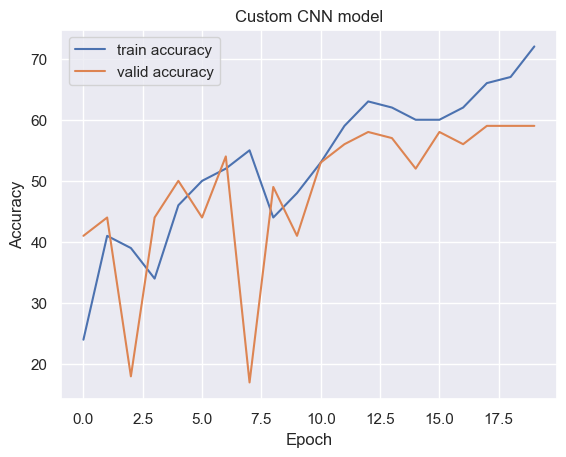

In [ ]:
plot_acc(train_accuracy_list, valid_accuracy_list, "Custom CNN model")

## custom CNN

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding="same")
        self.conv_2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding="same")
        self.pool_2 = nn.MaxPool2d(2, 2)

        self.conv_3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding="same")
        self.conv_4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding="same")
        self.pool_4 = nn.MaxPool2d(2, 2)

        self.conv_5 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding="same")
        self.conv_6 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding="same")
        self.pool_6 = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(1024, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 100)

    def forward(self, x):
        x = F.relu(self.conv_1(x))
        x = F.relu(self.conv_2(x))
        x = self.pool_2(x)

        x = F.relu(self.conv_3(x))
        x = F.relu(self.conv_4(x))
        x = self.pool_4(x)

        x = F.relu(self.conv_5(x))
        x = F.relu(self.conv_6(x))
        x = self.pool_6(x)

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [20]:
mean = [0.5070751592371323, 0.48654887331495095, 0.4409178433670343]
std = [0.26733428587941854, 0.25643846292120615, 0.2761504713263903]

transform_train = transforms.Compose([transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean, std, inplace=True)]
)
transform_test = transforms.Compose([transforms.Resize(32),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean, std)])

batch_size = 512

In [21]:
train_dataset = torchvision.datasets.CIFAR100("./data", train=True, transform=transform_train, download=True)
valid_dataset = torchvision.datasets.CIFAR100("./data", train=False, transform=transform_test, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [22]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size)

In [23]:
cnn_model = CNN().to(device=device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

In [24]:
train_accuracy_list, valid_accuracy_list = fit(n_epochs=50,
                                               model=cnn_model,
                                               criterion=criterion,
                                               optimizer=optimizer,
                                               trainloader=train_dataloader,
                                               testloader=test_dataloader)

100%|██████████| 20/20 [00:03<00:00,  5.94it/s]


Epoch: 1. Train acc: 3 %, Valid acc: 7 %


100%|██████████| 20/20 [00:04<00:00,  4.62it/s]


Epoch: 2. Train acc: 10 %, Valid acc: 13 %


100%|██████████| 20/20 [00:03<00:00,  5.95it/s]


Epoch: 3. Train acc: 14 %, Valid acc: 17 %


100%|██████████| 20/20 [00:03<00:00,  5.03it/s]


Epoch: 4. Train acc: 17 %, Valid acc: 21 %


100%|██████████| 20/20 [00:03<00:00,  5.92it/s]


Epoch: 5. Train acc: 20 %, Valid acc: 23 %


100%|██████████| 20/20 [00:03<00:00,  5.65it/s]


Epoch: 6. Train acc: 22 %, Valid acc: 26 %


100%|██████████| 20/20 [00:03<00:00,  5.62it/s]


Epoch: 7. Train acc: 24 %, Valid acc: 27 %


100%|██████████| 20/20 [00:03<00:00,  5.96it/s]


Epoch: 8. Train acc: 27 %, Valid acc: 30 %


100%|██████████| 20/20 [00:04<00:00,  4.62it/s]


Epoch: 9. Train acc: 28 %, Valid acc: 32 %


100%|██████████| 20/20 [00:03<00:00,  5.92it/s]


Epoch: 10. Train acc: 30 %, Valid acc: 32 %


100%|██████████| 20/20 [00:03<00:00,  5.45it/s]


Epoch: 11. Train acc: 31 %, Valid acc: 33 %


100%|██████████| 20/20 [00:03<00:00,  5.66it/s]


Epoch: 12. Train acc: 33 %, Valid acc: 34 %


100%|██████████| 20/20 [00:03<00:00,  5.98it/s]


Epoch: 13. Train acc: 34 %, Valid acc: 35 %


100%|██████████| 20/20 [00:04<00:00,  4.60it/s]


Epoch: 14. Train acc: 35 %, Valid acc: 36 %


100%|██████████| 20/20 [00:03<00:00,  5.95it/s]


Epoch: 15. Train acc: 36 %, Valid acc: 38 %


100%|██████████| 20/20 [00:04<00:00,  4.56it/s]


Epoch: 16. Train acc: 37 %, Valid acc: 38 %


100%|██████████| 20/20 [00:03<00:00,  6.03it/s]


Epoch: 17. Train acc: 38 %, Valid acc: 38 %


100%|██████████| 20/20 [00:03<00:00,  5.45it/s]


Epoch: 18. Train acc: 39 %, Valid acc: 39 %


100%|██████████| 20/20 [00:03<00:00,  5.83it/s]


Epoch: 19. Train acc: 40 %, Valid acc: 41 %


100%|██████████| 20/20 [00:03<00:00,  5.95it/s]


Epoch: 20. Train acc: 41 %, Valid acc: 41 %


100%|██████████| 20/20 [00:04<00:00,  4.72it/s]


Epoch: 21. Train acc: 42 %, Valid acc: 42 %


100%|██████████| 20/20 [00:03<00:00,  5.90it/s]


Epoch: 22. Train acc: 43 %, Valid acc: 42 %


100%|██████████| 20/20 [00:04<00:00,  4.99it/s]


Epoch: 23. Train acc: 43 %, Valid acc: 43 %


100%|██████████| 20/20 [00:03<00:00,  5.90it/s]


Epoch: 24. Train acc: 44 %, Valid acc: 42 %


100%|██████████| 20/20 [00:03<00:00,  5.96it/s]


Epoch: 25. Train acc: 45 %, Valid acc: 44 %


100%|██████████| 20/20 [00:04<00:00,  4.79it/s]


Epoch: 26. Train acc: 45 %, Valid acc: 44 %


100%|██████████| 20/20 [00:03<00:00,  6.01it/s]


Epoch: 27. Train acc: 46 %, Valid acc: 46 %


100%|██████████| 20/20 [00:04<00:00,  4.92it/s]


Epoch: 28. Train acc: 46 %, Valid acc: 45 %


100%|██████████| 20/20 [00:03<00:00,  5.93it/s]


Epoch: 29. Train acc: 47 %, Valid acc: 45 %


100%|██████████| 20/20 [00:03<00:00,  5.98it/s]


Epoch: 30. Train acc: 48 %, Valid acc: 46 %


100%|██████████| 20/20 [00:04<00:00,  4.98it/s]


Epoch: 31. Train acc: 48 %, Valid acc: 46 %


100%|██████████| 20/20 [00:03<00:00,  5.94it/s]


Epoch: 32. Train acc: 48 %, Valid acc: 47 %


100%|██████████| 20/20 [00:04<00:00,  4.73it/s]


Epoch: 33. Train acc: 49 %, Valid acc: 46 %


100%|██████████| 20/20 [00:03<00:00,  5.95it/s]


Epoch: 34. Train acc: 50 %, Valid acc: 47 %


100%|██████████| 20/20 [00:03<00:00,  5.71it/s]


Epoch: 35. Train acc: 50 %, Valid acc: 48 %


100%|██████████| 20/20 [00:03<00:00,  5.43it/s]


Epoch: 36. Train acc: 50 %, Valid acc: 48 %


100%|██████████| 20/20 [00:03<00:00,  5.98it/s]


Epoch: 37. Train acc: 50 %, Valid acc: 48 %


100%|██████████| 20/20 [00:04<00:00,  4.46it/s]


Epoch: 38. Train acc: 51 %, Valid acc: 49 %


100%|██████████| 20/20 [00:03<00:00,  5.98it/s]


Epoch: 39. Train acc: 52 %, Valid acc: 49 %


100%|██████████| 20/20 [00:03<00:00,  5.07it/s]


Epoch: 40. Train acc: 52 %, Valid acc: 48 %


100%|██████████| 20/20 [00:03<00:00,  6.05it/s]


Epoch: 41. Train acc: 52 %, Valid acc: 48 %


100%|██████████| 20/20 [00:03<00:00,  6.01it/s]


Epoch: 42. Train acc: 53 %, Valid acc: 49 %


100%|██████████| 20/20 [00:03<00:00,  5.33it/s]


Epoch: 43. Train acc: 53 %, Valid acc: 49 %


100%|██████████| 20/20 [00:03<00:00,  5.99it/s]


Epoch: 44. Train acc: 53 %, Valid acc: 49 %


100%|██████████| 20/20 [00:04<00:00,  4.57it/s]


Epoch: 45. Train acc: 54 %, Valid acc: 50 %


100%|██████████| 20/20 [00:03<00:00,  6.01it/s]


Epoch: 46. Train acc: 54 %, Valid acc: 50 %


100%|██████████| 20/20 [00:03<00:00,  5.86it/s]


Epoch: 47. Train acc: 54 %, Valid acc: 51 %


100%|██████████| 20/20 [00:03<00:00,  6.05it/s]


Epoch: 48. Train acc: 55 %, Valid acc: 50 %


100%|██████████| 20/20 [00:03<00:00,  6.02it/s]


Epoch: 49. Train acc: 55 %, Valid acc: 51 %


100%|██████████| 20/20 [00:04<00:00,  4.48it/s]

Epoch: 50. Train acc: 55 %, Valid acc: 51 %


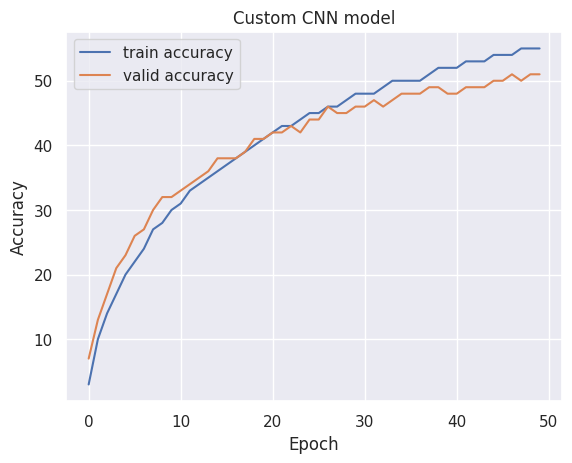

In [25]:
plot_acc(train_accuracy_list, valid_accuracy_list, "Custom CNN model")

# Задание 4

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

from matplotlib import pyplot as plt
import seaborn as sns


sns.set_theme()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
# import tarfile
# file = tarfile.open('./data/17flowers.tgz', "r:*")
# file.extractall("./data")

In [ ]:
# import os
# for i in range(1, 18):
#     os.makedirs(f"./data/flowers/train/{i}")
#     for img_idx in range(1, 61):
#         os.replace(f"./data/jpg/image_{img_idx + ((i - 1) * 80):0>4}.jpg", f"./data/flowers/train/{i}/image_{img_idx + ((i - 1) * 80):0>4}.jpg")

# for i in range(1, 18):
#     os.makedirs(f"./data/flowers/test/{i}")
#     for img_idx in range(61, 81):
#         os.replace(f"./data/jpg/image_{img_idx + ((i - 1) * 80):0>4}.jpg", f"./data/flowers/test/{i}/image_{img_idx + ((i - 1) * 80):0>4}.jpg")

In [ ]:
def fit(n_epochs, model, criterion, optimizer, trainloader, testloader):

    train_accuracy_list = []
    valid_accuracy_list = []
    for epoch in range(n_epochs):  # loop over the dataset multiple times

        correct = 0
        total = 0
        model.train(True)
        for i, data in tqdm(enumerate(trainloader, 0), total=len(trainloader)):
            inputs, labels = data[0].to(device), data[1].to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # print statistics
        train_accuracy = 100 * correct // total
        train_accuracy_list.append(train_accuracy)

        correct = 0
        total = 0
        model.eval()
        with torch.no_grad():
            for data in tqdm(testloader, total=len(testloader)):
                inputs, labels = data[0].to(device), data[1].to(device)

                # calculate outputs by running images through the network
                outputs = model(inputs)

                # the class with the highest energy is what we choose as prediction
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        valid_accuracy = 100 * correct // total
        valid_accuracy_list.append(valid_accuracy)

        print(f'Epoch: {epoch + 1}. Train acc: {train_accuracy} %, Valid acc: {valid_accuracy} %')

    return train_accuracy_list, valid_accuracy_list

In [ ]:
def plot_acc(train_acc, valid_acc, title):
    plt.plot(train_acc, label="train accuracy")
    plt.plot(valid_acc, label="valid accuracy")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")
    plt.show()

In [ ]:
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(size=(200, 200), antialias=True),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
test_transforms = transforms.Compose([
    transforms.Resize(size=(200, 200)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

batch_size = 32


train_dataset = torchvision.datasets.ImageFolder("./data/flowers/train",
                                                 transform=train_transforms)
test_dataset = torchvision.datasets.ImageFolder("./data/flowers/train",
                                                 transform=test_transforms)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## CNN model

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding="same")
        self.pool_1 = nn.MaxPool2d(2, 2)
        self.conv_2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding="same")
        self.pool_2 = nn.MaxPool2d(2, 2)
        self.conv_3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding="same")
        self.pool_3 = nn.MaxPool2d(2, 2)
        self.conv_4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
        self.pool_4 = nn.MaxPool2d(2, 2)
        self.conv_5 = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, padding="same")
        self.pool_5 = nn.MaxPool2d(2, 2)
        self.conv_6 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding="same")
        self.pool_6 = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(288, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 17)

    def forward(self, x):
        x = F.relu(self.conv_1(x))
        x = self.pool_1(x)

        x = F.relu(self.conv_2(x))
        x = self.pool_2(x)

        x = F.relu(self.conv_3(x))
        x = self.pool_3(x)

        x = F.relu(self.conv_4(x))
        x = self.pool_4(x)

        x = F.relu(self.conv_5(x))
        x = self.pool_5(x)

        x = F.relu(self.conv_6(x))
        x = self.pool_6(x)

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
custom_model_flowers = CNN().to(device=device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(custom_model_flowers.parameters(), lr=0.001)

In [ ]:
train_accuracy_list, valid_accuracy_list = fit(n_epochs=50,
                                               model=custom_model_flowers,
                                               criterion=criterion,
                                               optimizer=optimizer,
                                               trainloader=train_dataloader,
                                               testloader=test_dataloader)

100%|██████████| 32/32 [00:06<00:00,  5.32it/s]


Epoch: 1. Train acc: 5 %, Valid acc: 5 %


100%|██████████| 32/32 [00:06<00:00,  5.32it/s]


Epoch: 2. Train acc: 5 %, Valid acc: 5 %


100%|██████████| 32/32 [00:06<00:00,  4.85it/s]


Epoch: 3. Train acc: 6 %, Valid acc: 5 %


100%|██████████| 32/32 [00:06<00:00,  5.18it/s]


Epoch: 4. Train acc: 7 %, Valid acc: 7 %


100%|██████████| 32/32 [00:06<00:00,  4.89it/s]


Epoch: 5. Train acc: 10 %, Valid acc: 13 %


100%|██████████| 32/32 [00:06<00:00,  5.05it/s]


Epoch: 6. Train acc: 15 %, Valid acc: 18 %


100%|██████████| 32/32 [00:05<00:00,  5.49it/s]


Epoch: 7. Train acc: 19 %, Valid acc: 20 %


100%|██████████| 32/32 [00:05<00:00,  5.48it/s]


Epoch: 8. Train acc: 21 %, Valid acc: 29 %


100%|██████████| 32/32 [00:05<00:00,  5.62it/s]


Epoch: 9. Train acc: 24 %, Valid acc: 26 %


100%|██████████| 32/32 [00:05<00:00,  5.77it/s]


Epoch: 10. Train acc: 25 %, Valid acc: 27 %


100%|██████████| 32/32 [00:05<00:00,  5.79it/s]


Epoch: 11. Train acc: 24 %, Valid acc: 26 %


100%|██████████| 32/32 [00:05<00:00,  5.88it/s]


Epoch: 12. Train acc: 27 %, Valid acc: 31 %


100%|██████████| 32/32 [00:05<00:00,  5.72it/s]


Epoch: 13. Train acc: 28 %, Valid acc: 32 %


100%|██████████| 32/32 [00:05<00:00,  5.42it/s]


Epoch: 14. Train acc: 29 %, Valid acc: 32 %


100%|██████████| 32/32 [00:05<00:00,  5.50it/s]


Epoch: 15. Train acc: 28 %, Valid acc: 33 %


100%|██████████| 32/32 [00:05<00:00,  5.45it/s]


Epoch: 16. Train acc: 30 %, Valid acc: 34 %


100%|██████████| 32/32 [00:06<00:00,  5.21it/s]


Epoch: 17. Train acc: 32 %, Valid acc: 32 %


100%|██████████| 32/32 [00:06<00:00,  5.27it/s]


Epoch: 18. Train acc: 29 %, Valid acc: 33 %


100%|██████████| 32/32 [00:05<00:00,  5.37it/s]


Epoch: 19. Train acc: 30 %, Valid acc: 34 %


100%|██████████| 32/32 [00:05<00:00,  5.51it/s]


Epoch: 20. Train acc: 33 %, Valid acc: 35 %


100%|██████████| 32/32 [00:06<00:00,  5.06it/s]


Epoch: 21. Train acc: 32 %, Valid acc: 34 %


100%|██████████| 32/32 [00:06<00:00,  5.29it/s]


Epoch: 22. Train acc: 32 %, Valid acc: 33 %


100%|██████████| 32/32 [00:06<00:00,  5.29it/s]


Epoch: 23. Train acc: 33 %, Valid acc: 34 %


100%|██████████| 32/32 [00:06<00:00,  4.99it/s]


Epoch: 24. Train acc: 32 %, Valid acc: 33 %


100%|██████████| 32/32 [00:05<00:00,  5.38it/s]


Epoch: 25. Train acc: 35 %, Valid acc: 36 %


100%|██████████| 32/32 [00:06<00:00,  5.23it/s]


Epoch: 26. Train acc: 32 %, Valid acc: 38 %


100%|██████████| 32/32 [00:05<00:00,  5.38it/s]


Epoch: 27. Train acc: 36 %, Valid acc: 37 %


100%|██████████| 32/32 [00:06<00:00,  5.31it/s]


Epoch: 28. Train acc: 30 %, Valid acc: 38 %


100%|██████████| 32/32 [00:05<00:00,  5.54it/s]


Epoch: 29. Train acc: 35 %, Valid acc: 36 %


100%|██████████| 32/32 [00:05<00:00,  5.38it/s]


Epoch: 30. Train acc: 35 %, Valid acc: 36 %


100%|██████████| 32/32 [00:06<00:00,  5.27it/s]


Epoch: 31. Train acc: 34 %, Valid acc: 37 %


100%|██████████| 32/32 [00:05<00:00,  5.46it/s]


Epoch: 32. Train acc: 35 %, Valid acc: 36 %


100%|██████████| 32/32 [00:06<00:00,  5.28it/s]


Epoch: 33. Train acc: 35 %, Valid acc: 37 %


100%|██████████| 32/32 [00:05<00:00,  5.43it/s]


Epoch: 34. Train acc: 33 %, Valid acc: 38 %


100%|██████████| 32/32 [00:06<00:00,  5.06it/s]


Epoch: 35. Train acc: 37 %, Valid acc: 40 %


100%|██████████| 32/32 [00:05<00:00,  5.47it/s]


Epoch: 36. Train acc: 37 %, Valid acc: 38 %


100%|██████████| 32/32 [00:05<00:00,  5.67it/s]


Epoch: 37. Train acc: 37 %, Valid acc: 40 %


100%|██████████| 32/32 [00:05<00:00,  5.55it/s]


Epoch: 38. Train acc: 37 %, Valid acc: 37 %


100%|██████████| 32/32 [00:05<00:00,  5.55it/s]


Epoch: 39. Train acc: 37 %, Valid acc: 42 %


100%|██████████| 32/32 [00:05<00:00,  5.70it/s]


Epoch: 40. Train acc: 36 %, Valid acc: 38 %


100%|██████████| 32/32 [00:05<00:00,  5.65it/s]


Epoch: 41. Train acc: 38 %, Valid acc: 40 %


100%|██████████| 32/32 [00:05<00:00,  5.50it/s]


Epoch: 42. Train acc: 37 %, Valid acc: 43 %


100%|██████████| 32/32 [00:05<00:00,  5.34it/s]


Epoch: 43. Train acc: 39 %, Valid acc: 43 %


100%|██████████| 32/32 [00:06<00:00,  5.31it/s]


Epoch: 44. Train acc: 38 %, Valid acc: 41 %


100%|██████████| 32/32 [00:06<00:00,  5.28it/s]


Epoch: 45. Train acc: 39 %, Valid acc: 45 %


100%|██████████| 32/32 [00:06<00:00,  5.14it/s]


Epoch: 46. Train acc: 40 %, Valid acc: 44 %


100%|██████████| 32/32 [00:06<00:00,  4.91it/s]


Epoch: 47. Train acc: 41 %, Valid acc: 46 %


100%|██████████| 32/32 [00:06<00:00,  5.15it/s]


Epoch: 48. Train acc: 40 %, Valid acc: 45 %


100%|██████████| 32/32 [00:06<00:00,  5.29it/s]


Epoch: 49. Train acc: 42 %, Valid acc: 49 %


100%|██████████| 32/32 [00:06<00:00,  5.28it/s]

Epoch: 50. Train acc: 41 %, Valid acc: 49 %


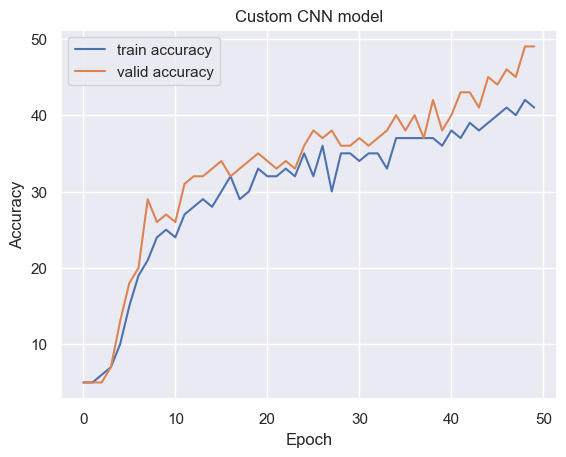

In [ ]:
plot_acc(train_accuracy_list, valid_accuracy_list, "Custom CNN model")

## resnet50

In [ ]:
resnet50 = torchvision.models.resnet50(weights=torchvision.models.ResNet50_Weights)

d:\Projects\PythonProjects\ML_Labs_2\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
resnet50.fc = torch.nn.Sequential(
    torch.nn.Linear(in_features=2048, out_features=256),
    torch.nn.Sigmoid(),
    torch.nn.Linear(in_features=256, out_features=17),
    # torch.nn.Softmax()
)

In [ ]:
resnet50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
resnet50 = resnet50.to(device=device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet50.parameters(), lr=0.001)

In [ ]:
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(size=(200, 200), antialias=True),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
test_transforms = transforms.Compose([
    transforms.Resize(size=(200, 200)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

batch_size = 16


train_dataset = torchvision.datasets.ImageFolder("./data/flowers/train",
                                                 transform=train_transforms)
test_dataset = torchvision.datasets.ImageFolder("./data/flowers/train",
                                                 transform=test_transforms)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
train_accuracy_list, valid_accuracy_list = fit(n_epochs=40,
                                               model=resnet50,
                                               criterion=criterion,
                                               optimizer=optimizer,
                                               trainloader=train_dataloader,
                                               testloader=test_dataloader)

  0%|          | 0/64 [00:00<?, ?it/s]d:\Projects\PythonProjects\ML_Labs_2\.venv\lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
100%|██████████| 64/64 [00:12<00:00,  5.26it/s]


Epoch: 1. Train acc: 29 %, Valid acc: 23 %


100%|██████████| 64/64 [00:12<00:00,  5.17it/s]


Epoch: 2. Train acc: 36 %, Valid acc: 33 %


100%|██████████| 64/64 [00:11<00:00,  5.67it/s]


Epoch: 3. Train acc: 37 %, Valid acc: 39 %


100%|██████████| 64/64 [00:11<00:00,  5.64it/s]


Epoch: 4. Train acc: 43 %, Valid acc: 46 %


100%|██████████| 64/64 [00:11<00:00,  5.73it/s]


Epoch: 5. Train acc: 50 %, Valid acc: 46 %


100%|██████████| 64/64 [00:11<00:00,  5.53it/s]


Epoch: 6. Train acc: 52 %, Valid acc: 48 %


100%|██████████| 64/64 [00:11<00:00,  5.42it/s]


Epoch: 7. Train acc: 53 %, Valid acc: 55 %


100%|██████████| 64/64 [00:12<00:00,  5.20it/s]


Epoch: 8. Train acc: 58 %, Valid acc: 56 %


100%|██████████| 64/64 [00:12<00:00,  5.16it/s]


Epoch: 9. Train acc: 56 %, Valid acc: 66 %


100%|██████████| 64/64 [00:12<00:00,  5.27it/s]


Epoch: 10. Train acc: 60 %, Valid acc: 64 %


100%|██████████| 64/64 [00:12<00:00,  5.25it/s]


Epoch: 11. Train acc: 61 %, Valid acc: 64 %


100%|██████████| 64/64 [00:13<00:00,  4.91it/s]


Epoch: 12. Train acc: 65 %, Valid acc: 65 %


100%|██████████| 64/64 [00:12<00:00,  5.23it/s]


Epoch: 13. Train acc: 65 %, Valid acc: 70 %


100%|██████████| 64/64 [00:12<00:00,  5.19it/s]


Epoch: 14. Train acc: 66 %, Valid acc: 63 %


100%|██████████| 64/64 [00:12<00:00,  5.25it/s]


Epoch: 15. Train acc: 70 %, Valid acc: 72 %


100%|██████████| 64/64 [00:12<00:00,  5.25it/s]


Epoch: 16. Train acc: 69 %, Valid acc: 72 %


100%|██████████| 64/64 [00:12<00:00,  5.27it/s]


Epoch: 17. Train acc: 72 %, Valid acc: 76 %


100%|██████████| 64/64 [00:12<00:00,  5.27it/s]


Epoch: 18. Train acc: 72 %, Valid acc: 77 %


100%|██████████| 64/64 [00:11<00:00,  5.37it/s]


Epoch: 19. Train acc: 69 %, Valid acc: 72 %


100%|██████████| 64/64 [00:12<00:00,  5.29it/s]


Epoch: 20. Train acc: 73 %, Valid acc: 77 %


100%|██████████| 64/64 [00:11<00:00,  5.62it/s]


Epoch: 21. Train acc: 73 %, Valid acc: 76 %


100%|██████████| 64/64 [00:11<00:00,  5.55it/s]


Epoch: 22. Train acc: 75 %, Valid acc: 83 %


100%|██████████| 64/64 [00:11<00:00,  5.61it/s]


Epoch: 23. Train acc: 74 %, Valid acc: 76 %


100%|██████████| 64/64 [00:11<00:00,  5.53it/s]


Epoch: 24. Train acc: 71 %, Valid acc: 72 %


100%|██████████| 64/64 [00:11<00:00,  5.60it/s]


Epoch: 25. Train acc: 76 %, Valid acc: 79 %


100%|██████████| 64/64 [00:11<00:00,  5.63it/s]


Epoch: 26. Train acc: 77 %, Valid acc: 84 %


100%|██████████| 64/64 [00:12<00:00,  5.14it/s]


Epoch: 27. Train acc: 78 %, Valid acc: 82 %


100%|██████████| 64/64 [00:12<00:00,  5.07it/s]


Epoch: 28. Train acc: 76 %, Valid acc: 79 %


100%|██████████| 64/64 [00:12<00:00,  5.14it/s]


Epoch: 29. Train acc: 76 %, Valid acc: 79 %


100%|██████████| 64/64 [00:11<00:00,  5.54it/s]


Epoch: 30. Train acc: 79 %, Valid acc: 85 %


100%|██████████| 64/64 [00:12<00:00,  5.19it/s]


Epoch: 31. Train acc: 81 %, Valid acc: 87 %


100%|██████████| 64/64 [00:12<00:00,  5.11it/s]


Epoch: 32. Train acc: 82 %, Valid acc: 88 %


100%|██████████| 64/64 [00:12<00:00,  5.17it/s]


Epoch: 33. Train acc: 81 %, Valid acc: 86 %


100%|██████████| 64/64 [00:12<00:00,  5.17it/s]


Epoch: 34. Train acc: 82 %, Valid acc: 81 %


100%|██████████| 64/64 [00:12<00:00,  5.27it/s]


Epoch: 35. Train acc: 81 %, Valid acc: 85 %


100%|██████████| 64/64 [00:12<00:00,  5.11it/s]


Epoch: 36. Train acc: 83 %, Valid acc: 89 %


100%|██████████| 64/64 [00:12<00:00,  4.94it/s]


Epoch: 37. Train acc: 85 %, Valid acc: 92 %


100%|██████████| 64/64 [00:12<00:00,  5.15it/s]


Epoch: 38. Train acc: 83 %, Valid acc: 92 %


100%|██████████| 64/64 [00:13<00:00,  4.89it/s]


Epoch: 39. Train acc: 85 %, Valid acc: 91 %


100%|██████████| 64/64 [00:11<00:00,  5.62it/s]

Epoch: 40. Train acc: 86 %, Valid acc: 89 %


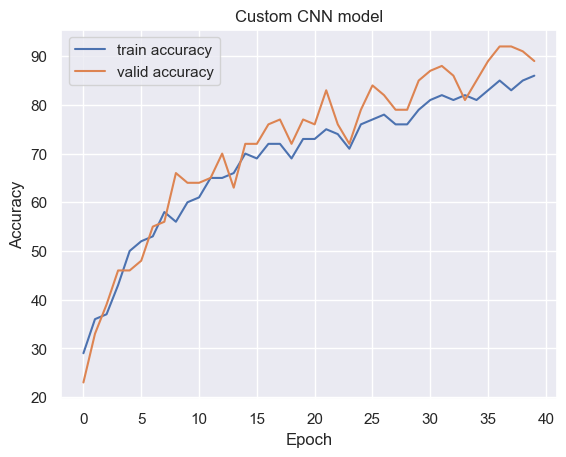

In [ ]:
plot_acc(train_accuracy_list, valid_accuracy_list, "Custom CNN model")